***
Load fold metrics
***

In [14]:
import pandas as pd
from pathlib import Path
import janus 

# Relative path fix
REPO_ROOT = Path(janus.__file__).resolve().parents[2] 
REPORTS_DIR = REPO_ROOT / "reports" / "model_cards"

folds_path = REPORTS_DIR / "churn_baseline_v1_temporal_cv_folds.csv"
df = pd.read_csv(folds_path)
df.head()

df["test_day"] = pd.to_datetime(df["test_day"])
df = df.sort_values("test_day")

df.head()


,test_day,rows_test,positives_test,skipped,pr_auc,roc_auc
0,2026-01-22,491,3,False,0.008033,0.514344
1,2026-01-23,491,1,False,0.003322,0.387755
2,2026-01-24,491,4,False,0.010493,0.537731
3,2026-01-25,491,2,False,0.011329,0.718303
4,2026-01-26,491,2,False,0.007192,0.579755


***
PR-AUC over time
***

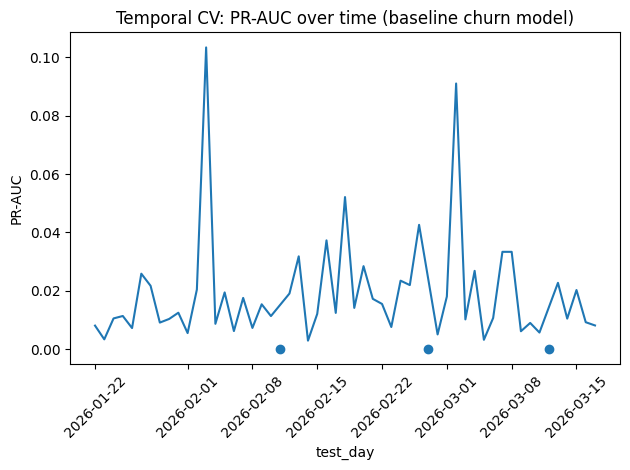

In [16]:
import matplotlib.pyplot as plt
import numpy as np

ok = df[~df["skipped"].astype(bool)].copy()
sk = df[df["skipped"].astype(bool)].copy()

plt.figure()
plt.plot(ok["test_day"], ok["pr_auc"])
if len(sk) > 0:
    plt.scatter(sk["test_day"], np.zeros(len(sk)))  # skipped folds at 0 as a marker

plt.title("Temporal CV: PR-AUC over time (baseline churn model)")
plt.xlabel("test_day")
plt.ylabel("PR-AUC")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***
ROC-AUC over time
***

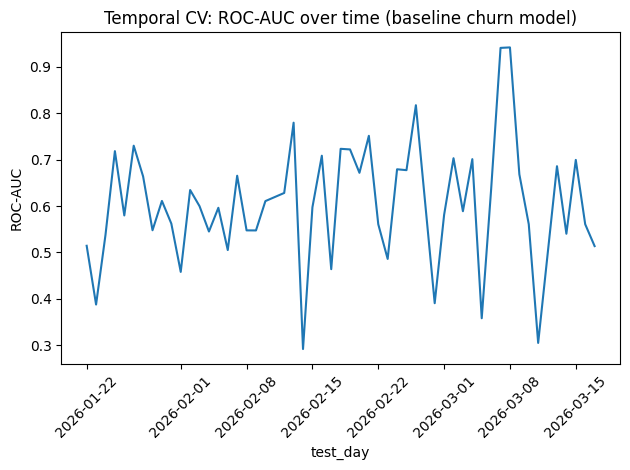

In [19]:
plt.figure()
plt.plot(ok["test_day"], ok["roc_auc"])
plt.title("Temporal CV: ROC-AUC over time (baseline churn model)")
plt.xlabel("test_day")
plt.ylabel("ROC-AUC")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***
Positives per test day
***

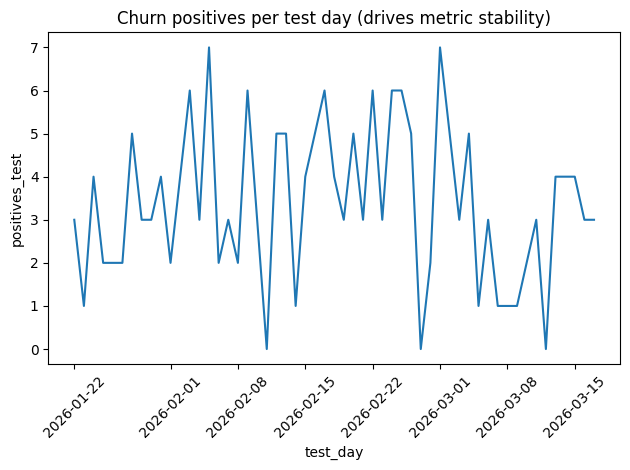

In [18]:
plt.figure()
plt.plot(df["test_day"], df["positives_test"])
plt.title("Churn positives per test day (drives metric stability)")
plt.xlabel("test_day")
plt.ylabel("positives_test")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***
PR-AUC (7 day rolling mean)
***

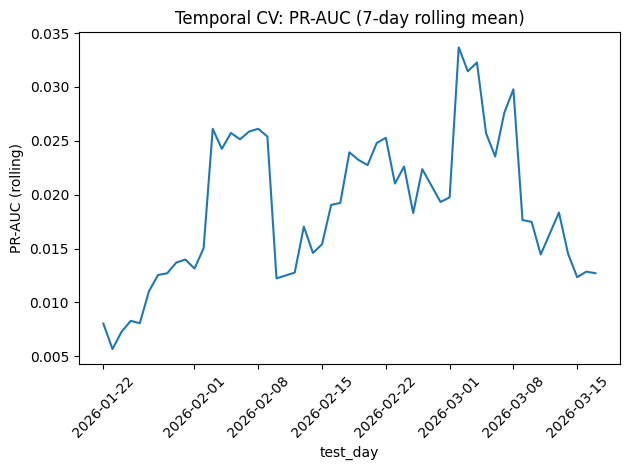

In [20]:
ok2 = ok.set_index("test_day")[["pr_auc", "roc_auc"]].rolling("7D").mean().reset_index()

plt.figure()
plt.plot(ok2["test_day"], ok2["pr_auc"])
plt.title("Temporal CV: PR-AUC (7-day rolling mean)")
plt.xlabel("test_day")
plt.ylabel("PR-AUC (rolling)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
